# Iris Flower Classification: Model Training & Evaluation

In this notebook, we will train a machine learning model to classify Iris flowers based on their features. We will then evaluate its performance and save the trained model.

### Import Libraries

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import joblib

sns.set_theme(style="whitegrid")

### Load the Dataset

In [15]:
df = pd.read_csv('../data/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Prepare Data for Training

In [16]:
X = df.drop('target', axis=1)
y = df['target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

Training set size: 120 samples
Testing set size: 30 samples


### Train the Model

In [18]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Evaluate the Model

In [19]:
y_pred = model.predict(X_test)

#### Confusion Matrix

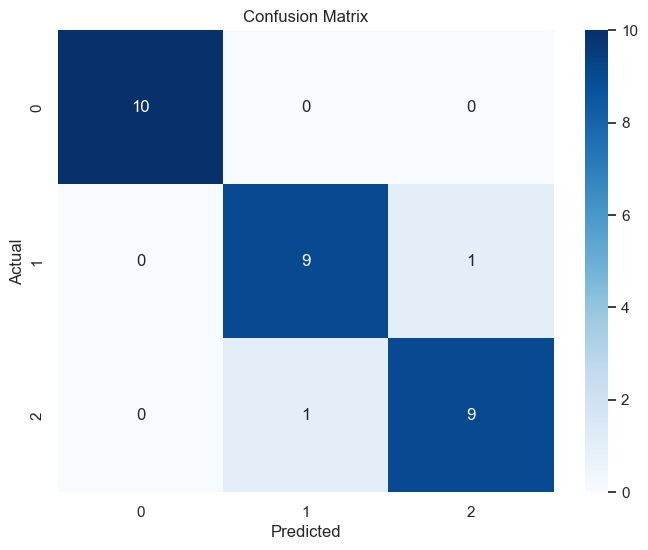

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix gives us a detailed look at our model's performance.
- **The Diagonal:** The numbers on the diagonal (from top-left to bottom-right) represent the number of **correct** predictions for each class. For example, the top-left cell shows how many flowers that were actually species `0` were correctly predicted as species `0`.
- **Off-Diagonal Errors:** Any numbers *off* the diagonal represent prediction errors. For instance, if you see a number in the row for `Actual: 1` and the column for `Predicted: 2`, it means the model incorrectly classified a species `1` flower as species `2`. In this case, we can see a few misclassifications between species `1` and `2`, which aligns with our findings from the EDA that these two species are harder to separate than species `0`.

#### Accuracy per Class

In [21]:
class_accuracy = 100 * cm.diagonal() / cm.sum(axis=1)
for i, accuracy in enumerate(class_accuracy):
    print(f"Accuracy for Class {i}: {accuracy:.2f}%")

Accuracy for Class 0: 100.00%
Accuracy for Class 1: 90.00%
Accuracy for Class 2: 90.00%


#### Classification Report

In [22]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



The classification report provides a more detailed breakdown of the model's performance for each class:

- **Precision:** This answers the question: "Of all the times the model predicted a certain species, how often was it correct?" A high precision for species `1` means that when the model says a flower is `versicolor`, it is very likely to be right.
- **Recall (Sensitivity):** This answers the question: "Of all the actual flowers of a certain species, how many did the model correctly identify?" A high recall for species `1` means the model is good at finding most of the `versicolor` flowers in the dataset.
- **F1-Score:** This is the harmonic mean of precision and recall. It provides a single metric that balances both concerns. It's particularly useful when you have an uneven class distribution (though not the case here).
- **Support:** This is simply the number of actual occurrences of the class in the test set.

### How to Achieve Better Predictions

Our Decision Tree model achieved an overall accuracy of 93%, which is excellent. It perfectly identified all flowers of species `0` (Setosa), but had a few errors when distinguishing between species `1` (Versicolor) and `2` (Virginica). This is a common challenge with the Iris dataset, as these two species are more similar to each other. To improve our predictions and potentially reach 100% accuracy, we can explore a few key strategies, starting with using more advanced models.

#### a) Experimenting with Different Algorithms

Different machine learning models have different strengths. Trying a few others is the next step.

1.  **Random Forest Classifier:** A Random Forest is an **ensemble model**, meaning it's built from many Decision Trees (a "forest"). It makes a final prediction by taking a majority vote from all the trees. This approach is often more accurate and robust than a single Decision Tree because it reduces the risk of overfitting to the training data.
2.  **Support Vector Machine (SVM):** An SVM is a model that works by finding the optimal boundary or hyperplane that best separates the classes. It can be very effective at finding the subtle differences between similar classes like Versicolor and Virginica.
3.  **K-Nearest Neighbors (KNN):** This  model that classifies a new flower based on the majority class of its 'k' closest neighbors in the feature space. It can be surprisingly effective for datasets where similar data points are close to each other.

#### b) Hyperparameter Tuning

Every model has settings, called **hyperparameters**, that you can adjust to improve its performance. For our Decision Tree, we used the default settings. We could potentially get better results by tuning hyperparameters like `max_depth` (how deep the tree can grow) or `min_samples_leaf` (the minimum number of samples required to be at a leaf node). Scikit-learn provides tools like `GridSearchCV` to automatically test many different combinations of these settings and find the best ones.

### Save the Trained Model

Finally, we save our trained model to a file so we can use it later for predictions without having to retrain it.

In [23]:
# Define the filename for the model
model_filename = '../models/iris_decision_tree.joblib'

# Save the model to the file
joblib.dump(model, model_filename)

['../models/iris_decision_tree.joblib']